## Car Price Case Study
### Problem Statement
Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
We are Given the `CarPrice_Assignment` Dataset.
Our Goal is to find out - 
- which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
- To know the accuracy of the model
<br>
So, we will perform `Multiple Linear Regression` using `statsmodels` as we need to predict and derive inferences from the data.

### Step 1 : Reading and Understanding Data:
Let us first import NumPy and Pandas and read the housing dataset
    

In [2]:
# suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing Numpy and Pandas
import numpy as np
import pandas as pd

In [4]:
# Reading CSV file to DataFrame
car_price = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
# Check the head of the dataset
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Performing Feature Engineering to Extract Car model from CarName in A new Columns
car_price['Model'], car_price['Name'] = car_price['CarName'].str.split(' ', 1).str

The dataset has been Loaded. Chekcing various aspects of Dataframe by performing Exploratory Analysis 

In [7]:
# Check the head of the dataset
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Model,Name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [8]:
#Droppin columns which are not Relevant to us
car_price.drop(['CarName', 'Name','car_ID'],axis=1,inplace=True)

In [9]:
#Colummns and Rows of Dataset
car_price.shape

(205, 25)

In [10]:
car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
#info about variable type and null values of dataset
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

***From the above description, we found out that there are no missing values.
We can also identify and extract the Categorical Varibles into a list for later use***

In [12]:
cat_var=['Model','fuelsystem', 'cylindernumber','enginetype','fueltype', 'aspiration','doornumber','carbody','drivewheel','enginelocation']

In [13]:
#Finding which of these are Binary and Require Mappig and which of these require DummyVarbles
def count_unique(col_list):
    count_unique_dict={}
    for i in col_list:
        count_unique_dict[i]=car_price[i].nunique()
    print(count_unique_dict)
count_unique(cat_var)

{'Model': 28, 'fuelsystem': 8, 'cylindernumber': 7, 'enginetype': 7, 'fueltype': 2, 'aspiration': 2, 'doornumber': 2, 'carbody': 5, 'drivewheel': 3, 'enginelocation': 2}


#### So, we found out that `'fueltype', 'aspiration', 'doornumber', 'enginelocation'` have only two unique values thus can be encoded to `Binary` form while `'Model', 'fuelsystem, 'cylindernumber', 'enginetype','carbody'` and `'drivewheel'` require `Dummy` varibles for encoding.

In [14]:
# summary of Each Numeric Column in DataFrame
car_price.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2 : Visualizing the Data
In order to get a better **understanding of the data** performing some visualizations. <br>

The main Goal of Visualization is:
- To catch multicollinearity.
- To Identify which predictor variable has the strongest association with Outcome Variable.

We'll visualise our data using `matplotlib` and `seaborn`.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizing the Numeric Variables
Creating PairPlot of All the Numberic Variables

***Not Done::As there are 15 numeric columns in our DataFrame let's divide them into two parts and visualize them.***

<Figure size 2304x2304 with 0 Axes>

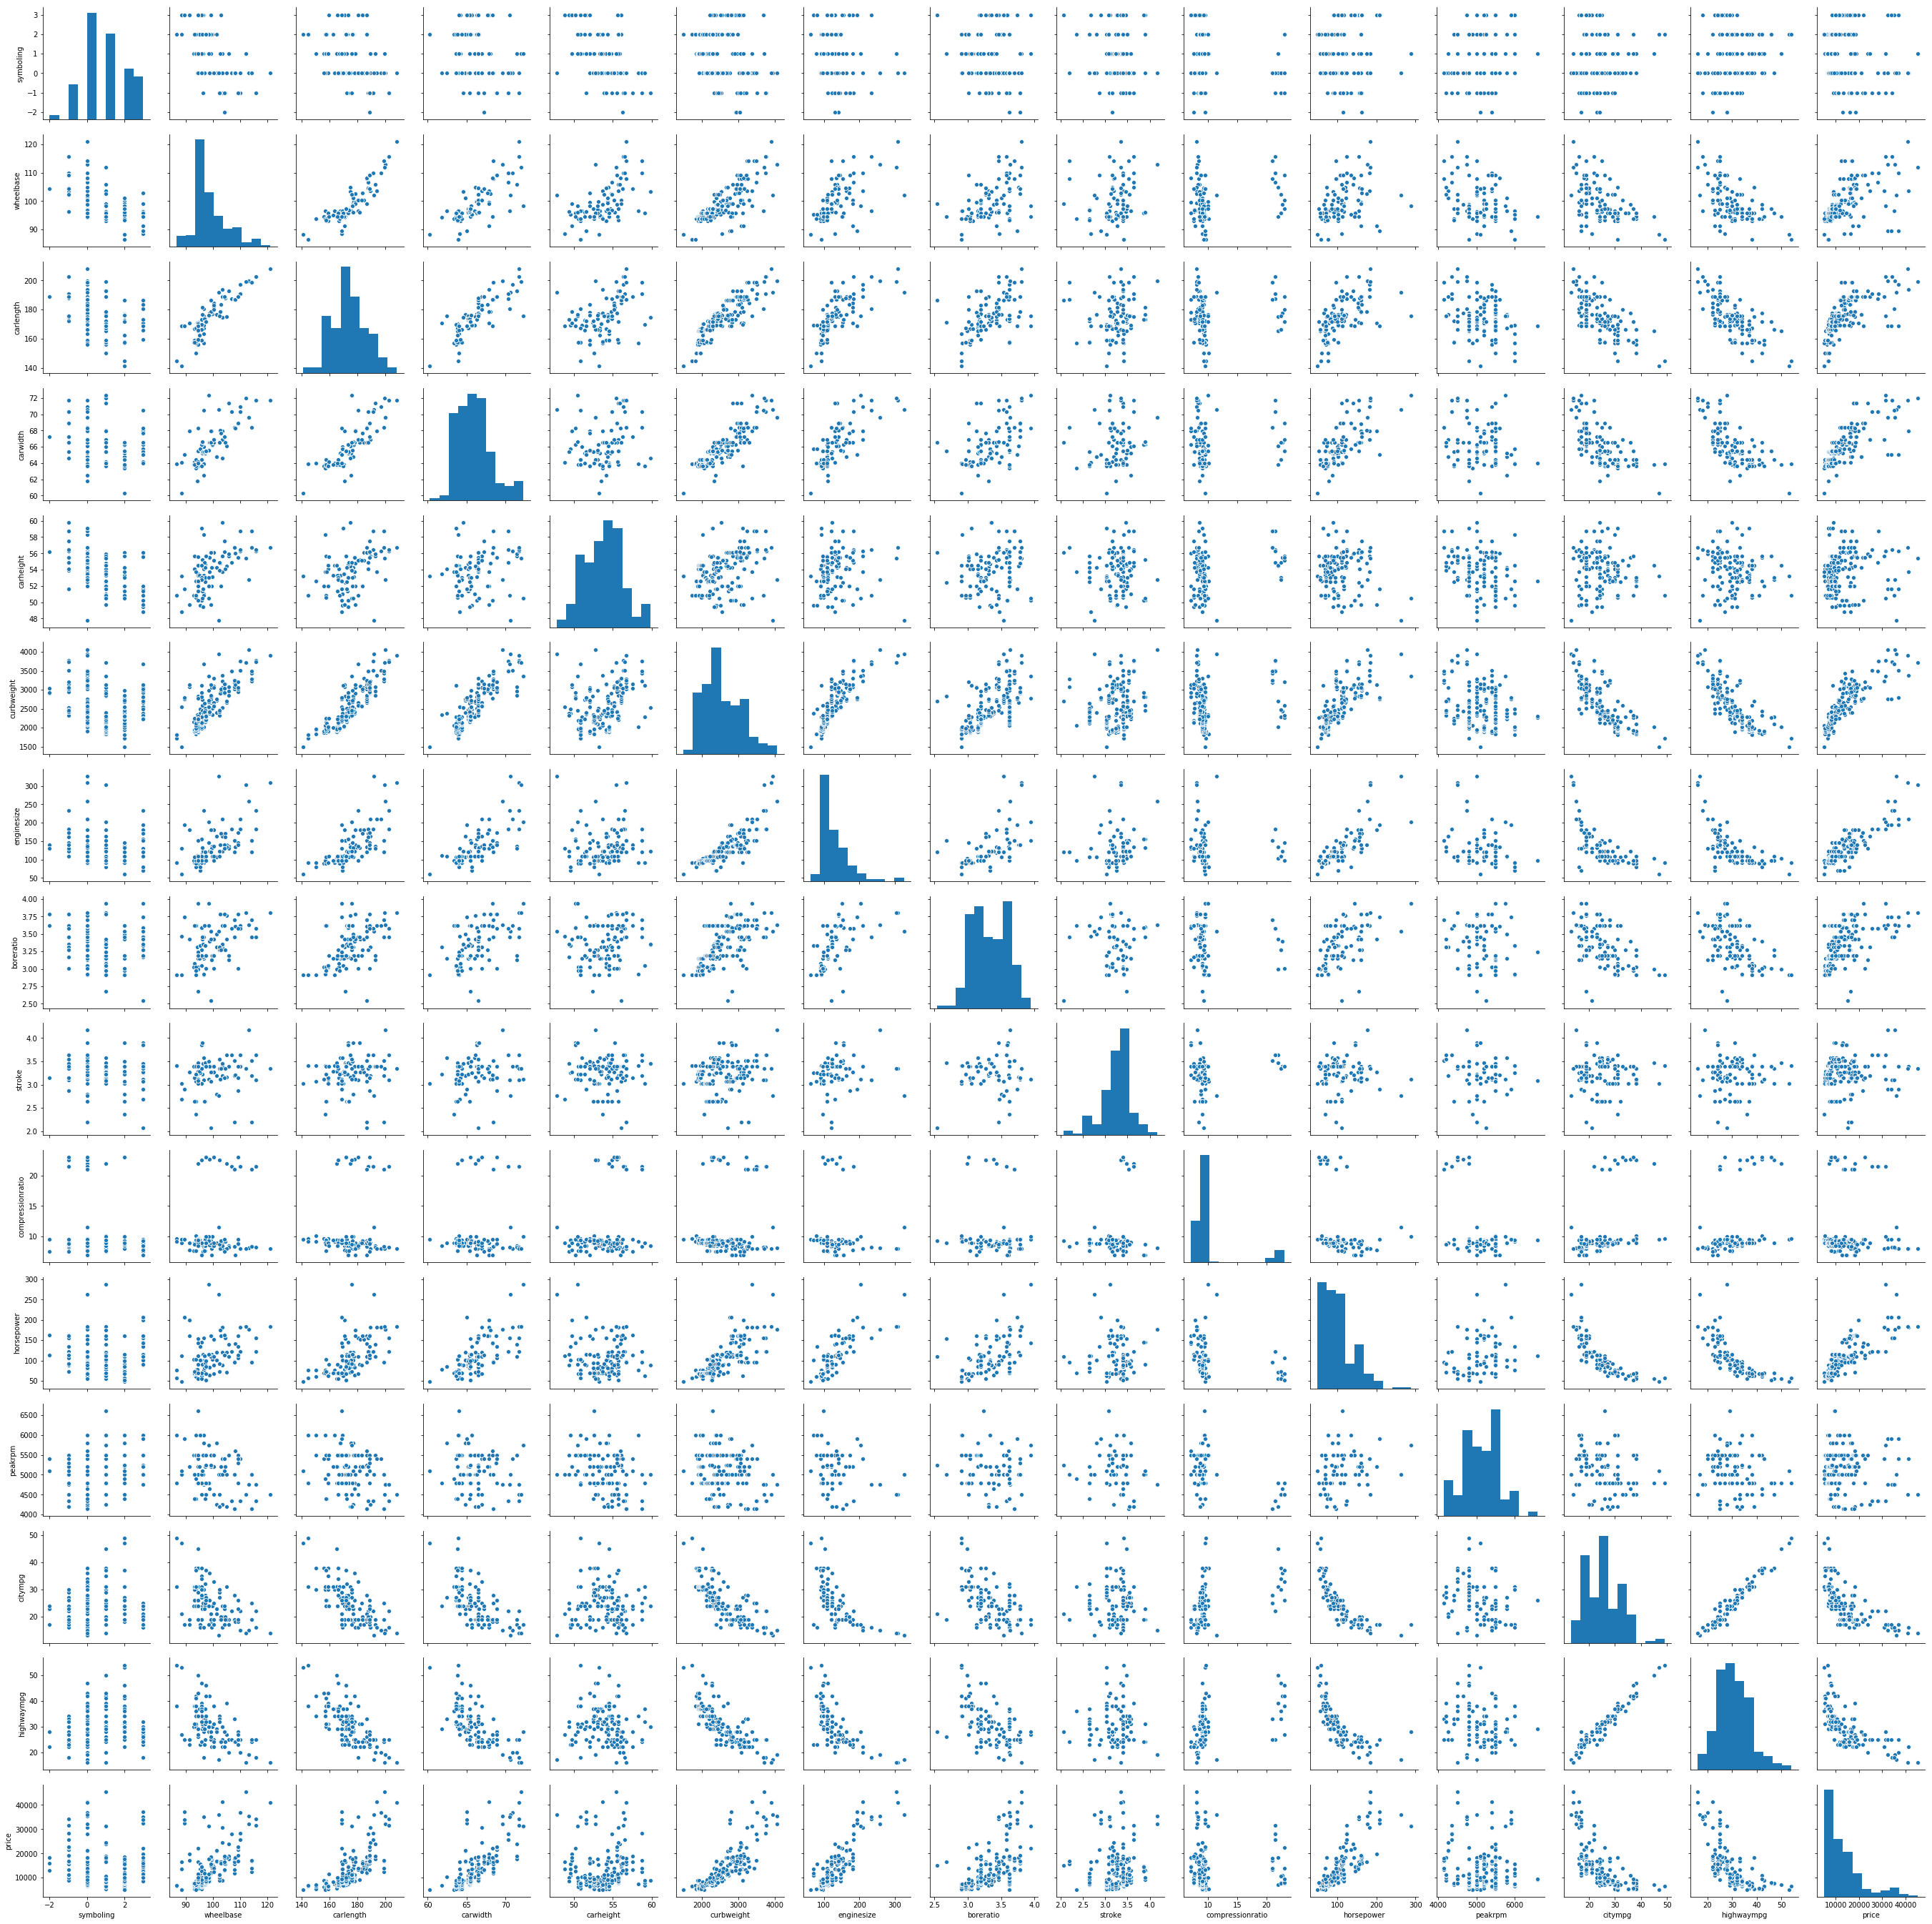

In [16]:
fig=plt.figure(figsize=(32,32))
sns.pairplot(car_price)
plt.show()

***As we double Clicked to zoom on in the Figure and analyzed there are a lot of variables which are showing `HIGH-COLLINEARITY` among each other. We will find the clear picture when we Draw the Heatmap of Correlation.***
***Also Price is showing a strong association with  `enginesize`,`horsepower`, `carwidth` , `carlength`,`curbweight`***


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

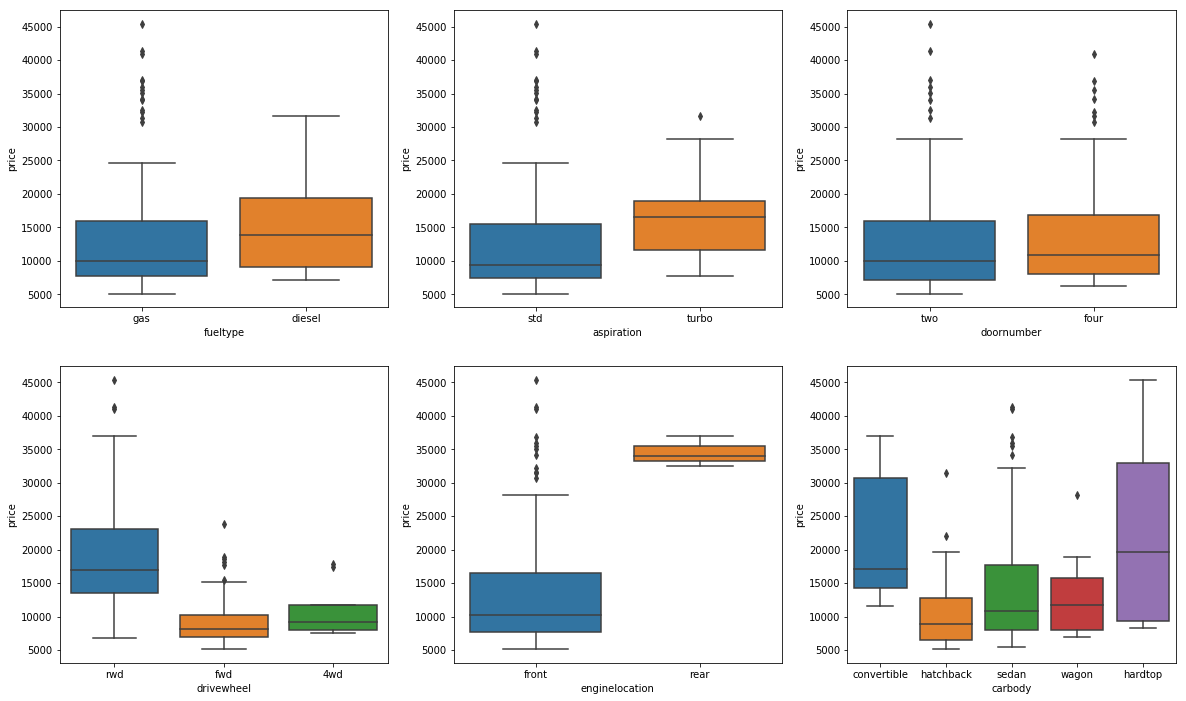

In [17]:
### there are a total of 10 cateogorical variables so we will write a function for plotting the boxplot of each of the.
def plot_box(cat_list):
    plt.figure(figsize=(20, 12))
    i=1
    for each in cat_list:
        plt.subplot(2,3,i)
        sns.boxplot(x = each,y = 'price',data = car_price)
        i+=1
    plt.show()
cat_list=['fueltype', 'aspiration','doornumber','drivewheel','enginelocation','carbody']
plot_box(cat_list)


***We will plot a heatmap to check the corelation between the variables***`

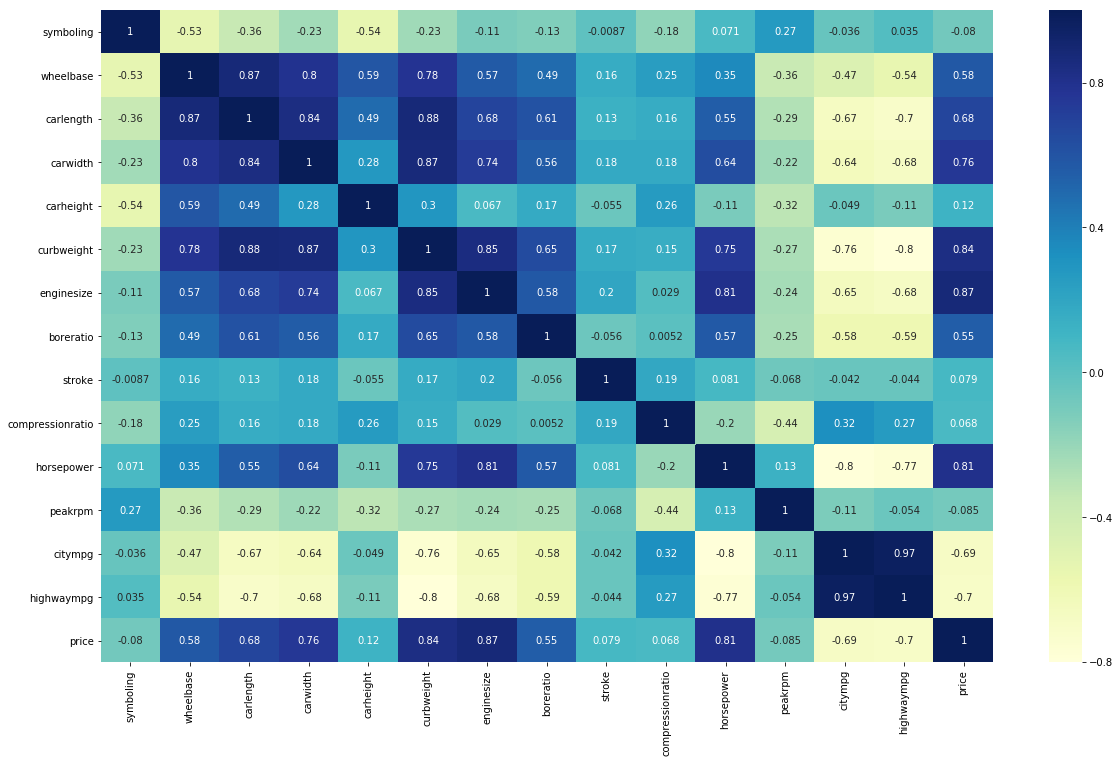

In [18]:
plt.figure(figsize=(20, 12))
sns.heatmap(car_price.corr(), cmap='YlGnBu', annot = True)
plt.show()

## Step 3 : Data preparation

#### Binary encoding

In [19]:
# List of variables to map
varlist = ['fueltype', 'aspiration', 'doornumber', 'enginelocation' ]
# Defining the map function
def binary_map(x):
    return x.map({x.unique()[0]:0,x.unique()[1]:1})
# Applying the function to the housing list
car_price[varlist] = car_price[varlist].apply(binary_map)
    

In [20]:
#verifying if the Variables has been Mapped
car_price[varlist].head(5)

,fueltype,aspiration,doornumber,enginelocation
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,1,0


#### Dummy encoding

The variable `'Model', 'fuelsystem, 'cylindernumber', 'enginetype','carbody'` and `'drivewheel'` have more than two levels.
We need to convert these levels into integer as well. 
For this, we will use something called dummy variables

In [21]:
# List of variables to be encoded
varlist_dummy = ['Model', 'fuelsystem', 'cylindernumber', 'enginetype','carbody','drivewheel' ]
# Defining the function to encode the variables


In [22]:
def dummy_encoding(varlist,df):
    for each in varlist:
        status=pd.get_dummies(df[each],drop_first=True)
        df.drop(each,axis=1,inplace=True)
        print(each)
        df=pd.concat([df,status],axis=1)
    
    return df
        
        
car_price=dummy_encoding(varlist_dummy,car_price)


Model
fuelsystem
cylindernumber
enginetype
carbody
drivewheel


In [23]:
car_price.shape

(205, 71)

In [24]:
car_price.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohc,ohcf,ohcv,rotor,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,1,0,0,0,1
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,0,1,0,1,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,1,0,0,0


In [25]:
car_price.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'alfa-romero', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porcshce', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo', 'vw', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'five', 'four', 'six',
       'three', 'twelve', 'two', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 
For ease of Model eavaluation and bringing units of all the variables to a comparable Scale,we will use Rescale.
We are using the Min-Max scaling of skLearn

In [27]:
var_to_scale=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])

In [29]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohc,ohcf,ohcv,rotor,hardtop,hatchback,sedan,wagon,fwd,rwd
122,0.6,0,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,1,0,0,0,0,0,1,0,1,0
125,1.0,0,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,1,0,0,0,0,1,0,0,0,1
166,0.6,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,1,0,0,0,1
1,1.0,0,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,0,0,1
199,0.2,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,1,0,0,0,0,0,0,1,0,1


In [30]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohc,ohcf,ohcv,rotor,hardtop,hatchback,sedan,wagon,fwd,rwd
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.090909,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.685315,0.083916,0.062937,0.027972,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.466023,0.278236,0.243703,0.165472,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.600000,0.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the data into Predictor Variable and Outcome Variable

In [31]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5 Building a Linear Model
Let's Fit a regression line through the training data using `statsmodels`. But first we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [32]:
import statsmodels.api as sm

In [33]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [34]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     51.79
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.00e-46
Time:                        20:29:02   Log-Likelihood:                 280.71
No. Observations:                 143   AIC:                            -437.4
Df Residuals:                      81   BIC:                            -253.7
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3846      0.188     -2.049      0.044      -0.758      -0.011
symboling           -0.0130      0.040     -0.328      0.744      -0.092       0.066
fueltype             0.1215      0.119      1.021      0.310      -0.115       0.358
aspiration           0.0831      0.030      2.772      0.007       0.023       0.143
doornumber           0.0115      0.016      0.721      0.473      -0.020       0.043
enginelocation       0.2043      0.065      3.139      0.002       0.075       0.334
wheelbase            0.2124      0.100      2.124      0.037       0.013       0.411
carlength           -0.1720      0.103     -1.667      0.099      -0.377       0.033
carwidth             0.2786      0.108      2.572      0.012       0.063       0.494
carheight           -0.1689      0.055     -3.091      0.003      -0.278      -0.060
curbweight           0.3095      0.135      2.289      0.025       0.040       0.579
enginesize           2.1053      0.504      4.180      0.000       1.103       3.107
boreratio           -0.6562      0.186     -3.532      0.001      -1.026      -0.286
stroke              -0.2014      0.089     -2.271      0.026      -0.378      -0.025
compressionratio    -0.3173      0.281     -1.128      0.263      -0.877       0.242
horsepower          -0.2091      0.215     -0.971      0.334      -0.637       0.219
peakrpm              0.1817      0.053      3.450      0.001       0.077       0.287
citympg             -0.0535      0.160     -0.335      0.739      -0.371       0.264
highwaympg           0.1101      0.147      0.749      0.456      -0.182       0.403
alfa-romero         -0.0257      0.087     -0.294      0.770      -0.199       0.148
audi                 0.0439      0.079      0.558      0.578      -0.113       0.200
bmw                  0.3266      0.067      4.853      0.000       0.193       0.460
buick                0.0240      0.090      0.265      0.792      -0.156       0.204
chevrolet           -0.0700      0.062     -1.135      0.260      -0.193       0.053
dodge               -0.1287      0.059     -2.200      0.031      -0.245      -0.012
honda               -0.0881      0.071     -1.238      0.219      -0.230       0.054
isuzu               -0.0147      0.058     -0.251      0.802      -0.131       0.102
jaguar              -0.1509      0.119     -1.273      0.207      -0.387       0.085
maxda               -0.0173      0.061     -0.285      0.777      -0.138       0.104
mazda                0.0094      0.053      0.178      0.859      -0.096       0.115
mercury           1.311e-16   7.04e-16      0.186      0.853   -1.27e-15    1.53e-15
mitsubishi          -0.1458      0.058     -2.509      0.014      -0.261      -0.030
nissan               0.0091      0.049      0.184      0.854      -0.089       0.107
peugeot             -0.

In [35]:
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [37]:
vif

,Features,VIF
32,peugeot,inf
1,fueltype,inf
38,subaru,inf
47,idi,inf
4,enginelocation,inf
55,three,inf
57,two,inf
59,l,inf
61,ohcf,inf
63,rotor,inf


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# Creating Linear Regression model
lr_sk_1 = LinearRegression()
lr_sk_1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
select = RFE(lr_sk_1, 10 ,step=1)
select = select.fit(X_train,y_train)

In [41]:
# Ranking features based on their relevancy
select.ranking_

array([43, 25, 14, 52,  1, 17, 21,  1, 18,  1,  1,  1,  2, 26, 15, 16, 37,
       27, 53, 35,  1, 36, 23, 20, 22, 56, 28, 55, 44, 48, 13, 45,  6, 19,
       46,  1, 38,  9, 11, 59, 51, 49, 57,  8, 42, 34, 40, 24, 50, 58, 54,
       47,  5,  4, 29,  1,  1,  3, 12,  7, 61, 10, 39,  1, 31, 30, 32, 33,
       60, 41])

In [42]:
select.support_

array([False, False, False, False,  True, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False])

In [43]:
# Zipping column names, ranking and support
list(zip(X_train.columns,select.support_,select.ranking_))

[('symboling', False, 43),
 ('fueltype', False, 25),
 ('aspiration', False, 14),
 ('doornumber', False, 52),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 37),
 ('highwaympg', False, 27),
 ('alfa-romero', False, 53),
 ('audi', False, 35),
 ('bmw', True, 1),
 ('buick', False, 36),
 ('chevrolet', False, 23),
 ('dodge', False, 20),
 ('honda', False, 22),
 ('isuzu', False, 56),
 ('jaguar', False, 28),
 ('maxda', False, 55),
 ('mazda', False, 44),
 ('mercury', False, 48),
 ('mitsubishi', False, 13),
 ('nissan', False, 45),
 ('peugeot', False, 6),
 ('plymouth', False, 19),
 ('porcshce', False, 46),
 ('porsche', True, 1),
 ('renault', False, 38),
 ('saab', False, 9),
 ('subaru', False, 11),
 ('toyota',

In [44]:
# Selecting relevant features for building model
col = X_train.columns[select.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'bmw', 'porsche', 'three', 'twelve', 'rotor'],
      dtype='object')

In [45]:
# Building Linear Regression model and eliminating features based on P values
X_train_lm2 = X_train_lm[col]
X_train_lm2 = sm.add_constant(X_train_lm2)
lr_2 = sm.OLS(y_train,X_train_lm2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.21e-64
Time:                        20:29:14   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1594      0.019     -8.597      0.000      -0.196      -0.123
enginelocation     0.3298      0.086      3.844      0.000       0.160       0.500
carwidth           0.3283      0.067      4.910      0.000       0.196       0.461
curbweight         0.2989      0.080      3.729      0.000       0.140       0.457
enginesize         0.5732      0.097      5.926      0.000       0.382       0.764
boreratio         -0.1088      0.037     -2.976      0.003      -0.181      -0.036
bmw                0.2453      0.029      8.327      0.000       0.187       0.304
porsche            0.1565      0.052      3.000      0.003       0.053       0.260
three              0.1802      0.068      2.638      0.009       0.045       0.315
twelve            -0.0536      0.081     -0.659      0.511      -0.214       0.107
rotor              0.1542      0.037      4.123      0.000       0.080       0.228
==============================================================================
Omnibus:                       10.995   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.683
Skew:                           0.423   Prob(JB):                     0.000393
Kurtosis:                       4.385   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# We found 'twelve' has p-value greater then 0.5, so we will drop it and build the model again
X_train_lm3 = X_train_lm2.drop(['twelve'],axis = 1 )
X_train_lm3 = sm.add_constant(X_train_lm3)
lr_3 = sm.OLS(y_train,X_train_lm3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.18e-65
Time:                        20:29:14   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1587      0.018     -8.591      0.000      -0.195      -0.122
enginelocation     0.3348      0.085      3.925      0.000       0.166       0.503
carwidth           0.3303      0.067      4.954      0.000       0.198       0.462
curbweight         0.3126      0.077      4.048      0.000       0.160       0.465
enginesize         0.5389      0.081      6.625      0.000       0.378       0.700
boreratio         -0.1075      0.036     -2.952      0.004      -0.180      -0.035
bmw                0.2490      0.029      8.628      0.000       0.192       0.306
porsche            0.1596      0.052      3.077      0.003       0.057       0.262
three              0.1793      0.068      2.631      0.010       0.044       0.314
rotor              0.1485      0.036      4.089      0.000       0.077       0.220
==============================================================================
Omnibus:                       12.252   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.484
Skew:                           0.473   Prob(JB):                     0.000160
Kurtosis:                       4.428   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# We dropped 'three' as it has significantly larger p-value in comparison to other features
X_train_lm4= X_train_lm3.drop(['three'],axis = 1 )
X_train_lm4 = sm.add_constant(X_train_lm4)
lr_4 = sm.OLS(y_train,X_train_lm4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.55e-65
Time:                        20:29:15   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1478      0.018     -8.035      0.000      -0.184      -0.111
enginelocation     0.3233      0.087      3.715      0.000       0.151       0.495
carwidth           0.3036      0.067      4.509      0.000       0.170       0.437
curbweight         0.3210      0.079      4.071      0.000       0.165       0.477
enginesize         0.5421      0.083      6.523      0.000       0.378       0.706
boreratio         -0.1107      0.037     -2.974      0.003      -0.184      -0.037
bmw                0.2480      0.029      8.413      0.000       0.190       0.306
porsche            0.1675      0.053      3.165      0.002       0.063       0.272
rotor              0.1481      0.037      3.990      0.000       0.075       0.222
==============================================================================
Omnibus:                       14.299   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.369
Skew:                           0.575   Prob(JB):                     6.22e-05
Kurtosis:                       4.389   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Checking VIF of Each predictor Variable
vif = pd.DataFrame()
vif['Features']=X_train_lm4.columns
vif['VIF'] = [ variance_inflation_factor(X_train_lm4.values,i) for i in range(X_train_lm4.shape[1])]
vif.sort_values(by = 'VIF' , ascending=False)



,Features,VIF
0,const,10.593596
3,curbweight,8.623617
4,enginesize,5.131024
2,carwidth,4.796790
5,boreratio,1.845748
7,porsche,1.798812
1,enginelocation,1.645996
8,rotor,1.172613
6,bmw,1.093582


### Remove Curbweight

In [49]:
# create one more model after removing 'curbweight' as it has highest vif value
X_train_lm5=X_train_lm4.drop('curbweight',1)
X_train_lm5.head()
lr_5 = sm.OLS(y_train,X_train_lm5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.55e-63
Time:                        20:29:18   Log-Likelihood:                 178.67
No. Observations:                 143   AIC:                            -341.3
Df Residuals:                     135   BIC:                            -317.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1667      0.019     -8.863      0.000      -0.204      -0.129
enginelocation     0.3512      0.092      3.833      0.000       0.170       0.532
carwidth           0.4714      0.056      8.385      0.000       0.360       0.583
enginesize         0.7544      0.068     11.041      0.000       0.619       0.890
boreratio         -0.0679      0.038     -1.800      0.074      -0.142       0.007
bmw                0.2489      0.031      7.993      0.000       0.187       0.310
porsche            0.1079      0.054      2.010      0.046       0.002       0.214
rotor              0.1751      0.039      4.539      0.000       0.099       0.251
==============================================================================
Omnibus:                       12.708   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.708
Skew:                           0.648   Prob(JB):                      0.00106
Kurtosis:                       3.789   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# After removing 'curbweight', we observed vif value for other columns also got adjusted itself, 
# so this is the final model which we built
vif = pd.DataFrame()
vif['Feature'] = X_train_lm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm5.values ,i) for i in range(X_train_lm5.shape[1])]
vif.sort_values(by='VIF', ascending = False)

,Feature,VIF
0,const,9.923057
3,enginesize,3.109710
2,carwidth,2.998631
4,boreratio,1.698459
6,porsche,1.661406
1,enginelocation,1.635754
7,rotor,1.135211
5,bmw,1.093529


## Making Predictions on Train data

In [51]:
y_train_pred=lr_5.predict(X_train_lm5)

In [52]:
y_train_pred.head()

122    0.060536
125    0.443902
166    0.053851
1      0.136493
199    0.250201
dtype: float64

## Step 7: Residual Analysis of the train data

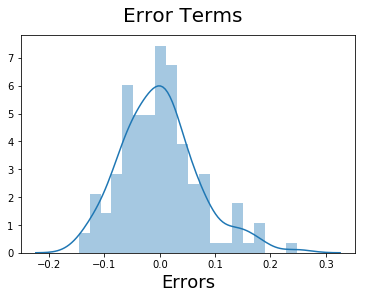

In [53]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.plot()
plt.show()

## Making Predictions on Test data

In [54]:
df_test[var_to_scale] = scaler.transform(df_test[var_to_scale])
X_test=df_test[X_train_lm5.columns.drop('const')]

X_test_sm = sm.add_constant(X_test)
y_test= df_test['price']

In [55]:
X_test_sm.head()

,const,enginelocation,carwidth,enginesize,boreratio,bmw,porsche,rotor
160,1.0,0,0.341667,0.139623,0.404762,0,0,0
186,1.0,0,0.433333,0.181132,0.404762,0,0,0
59,1.0,0,0.516667,0.230189,0.563492,0,0,0
165,1.0,0,0.308333,0.139623,0.444444,0,0,0
140,1.0,0,0.291667,0.177358,0.746032,0,0,0


In [56]:
y_pred=lr_5.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

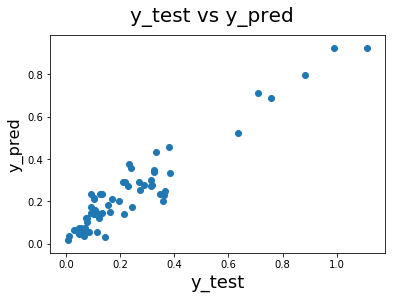

In [57]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [59]:
#Calculating RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.07240700069127744

In [58]:
# Calculating R-Squared score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9019093191734329

 **The Equation of Our Best Fitted line **

***price = enginelocation * 0.3512 + carwidth * 0.4714 + enginesize * 0.7544 - boreratio * 0.0679 + bmw * 0.2489 + porsche * 0.1079 + rotor * 0.1751 - 0.1667***